In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 

In [2]:
df = pd.read_csv("H:\\AiQuest\\Ai& ML\\practice\\class 10\\mall customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis = 1, inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [5]:
df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)':'score', 'Age' :'age', 'Gender' : 'gender'}, inplace = True)

In [6]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


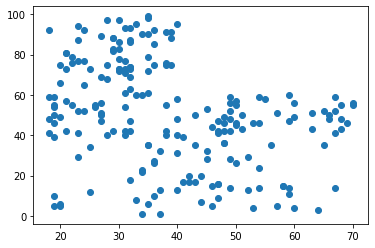

In [7]:
plt.scatter(df.age, df.score)

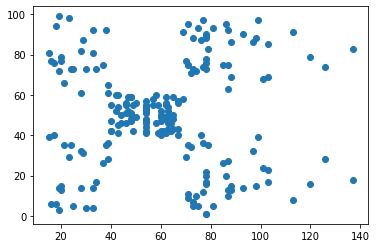

In [8]:
plt.scatter(df.income, df.score)

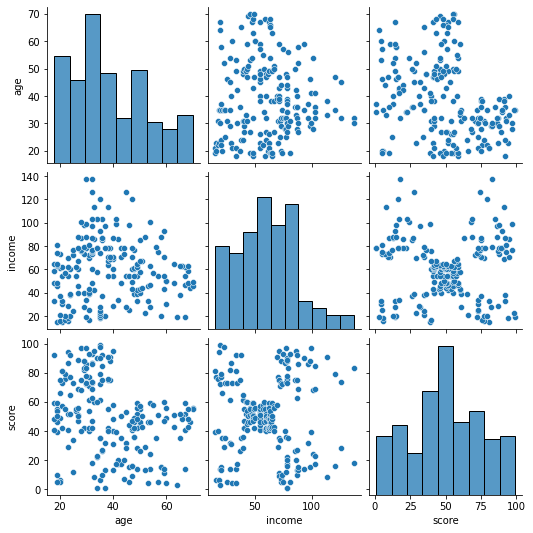

In [9]:
sns.pairplot(df[['age','income', 'score']])

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=.20)
train.to_csv('train data kNN.csv')

In [11]:
import sklearn.cluster as cluster

In [12]:
kMean1 = cluster.KMeans()

In [13]:
kMean1.fit(df[['income','score']])

KMeans()

In [14]:
kMean1.predict(df[['income','score']])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 5, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 2, 6, 2, 6, 2,
       5, 2, 6, 2, 6, 2, 6, 2, 6, 2, 5, 2, 6, 2, 5, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 6, 2, 5, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2, 6, 2,
       6, 2, 6, 2, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7, 0, 7,
       0, 7])

In [15]:
#kMean1.fit_predict(df[['income','score']])

In [16]:
df['predicted cluster'] = kMean1.predict(df[['income','score']])
df.head()

,gender,age,income,score,predicted cluster
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


In [17]:
df.tail()

,gender,age,income,score,predicted cluster
195,Female,35,120,79,7
196,Female,45,126,28,0
197,Male,32,126,74,7
198,Male,32,137,18,0
199,Male,30,137,83,7


In [18]:
center1 =  kMean1.cluster_centers_
center1

array([[109.7       ,  22.        ],
       [ 47.29545455,  51.40909091],
       [ 78.55172414,  82.17241379],
       [ 25.0952381 ,  80.04761905],
       [ 25.14285714,  19.52380952],
       [ 63.72093023,  46.1627907 ],
       [ 80.18181818,  12.68181818],
       [109.7       ,  82.        ]])

In [19]:
df0 = df[df['predicted cluster'] == 0]
df1 = df[df['predicted cluster'] == 1]
df2 = df[df['predicted cluster'] == 2]
df3 = df[df['predicted cluster'] == 3]
df4 = df[df['predicted cluster'] == 4]
df5 = df[df['predicted cluster'] == 5]
df6 = df[df['predicted cluster'] == 6]
df7 = df[df['predicted cluster'] == 7]

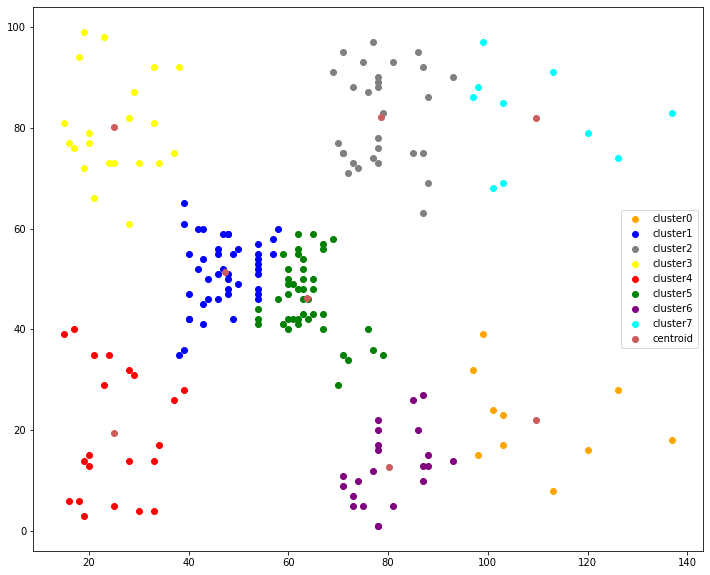

In [20]:
plt.figure(figsize= (12, 10))

plt.scatter(df0['income'], df0['score'] , color= 'orange', label = 'cluster0')
plt.scatter(df1['income'], df1['score'] , color= 'blue', label = 'cluster1')
plt.scatter(df2['income'], df2['score'] , color= 'gray', label = 'cluster2')
plt.scatter(df3['income'], df3['score'] , color= 'yellow', label = 'cluster3')
plt.scatter(df4['income'], df4['score'] , color= 'red', label = 'cluster4')
plt.scatter(df5['income'], df5['score'] , color= 'green', label = 'cluster5')
plt.scatter(df6['income'], df6['score'] , color= 'purple', label = 'cluster6')
plt.scatter(df7['income'], df7['score'] , color= 'cyan', label = 'cluster7')


plt.scatter(center1[:,0], center1[:,1], color='#CD5C5C', label='centroid')

plt.legend()

# Tuning

In [21]:
from sklearn.cluster import KMeans

wcss = []

clusters = range(1,16)

for k in  clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['score','income']])
    wcss.append(kmeans.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25011.92025547377,
 21862.092672182887,
 19636.75396489815,
 17856.51076210611,
 16217.152219355099,
 14313.225387375389,
 12797.180630643867,
 11747.060441751233]

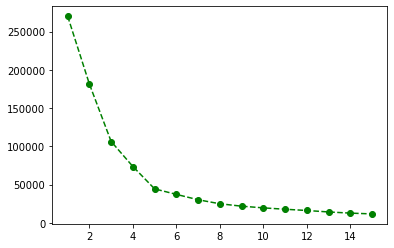

In [23]:
plt.plot(clusters,wcss, 'go--')

In [24]:
from kneed import KneeLocator #3rd party module
kn = KneeLocator(clusters, wcss, curve='convex', direction='decreasing')

In [25]:
kn.knee

5

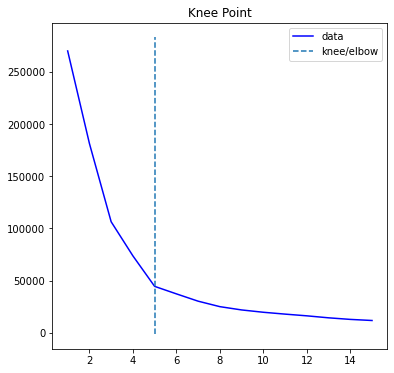

In [26]:
kn.plot_knee()

In [27]:
kMean2 = cluster.KMeans(n_clusters=kn.knee)

In [28]:
kMean2.fit_predict(df[['income','score']])

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [29]:
df['new cluster'] = kMean2.predict(df[['income','score']])
df.head()

,gender,age,income,score,predicted cluster,new cluster
0,Male,19,15,39,4,4
1,Male,21,15,81,3,1
2,Female,20,16,6,4,4
3,Female,23,16,77,3,1
4,Female,31,17,40,4,4


In [30]:
df0 = df[df['new cluster'] == 0]
df1 = df[df['new cluster'] == 1]
df2 = df[df['new cluster'] == 2]
df3 = df[df['new cluster'] == 3]
df4 = df[df['new cluster'] == 4]


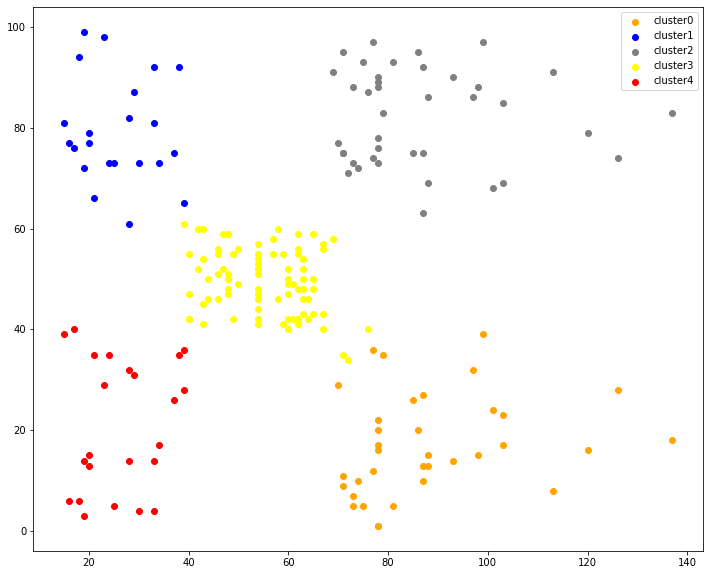

In [31]:
plt.figure(figsize= (12, 10))

plt.scatter(df0['income'], df0['score'] , color= 'orange', label = 'cluster0')
plt.scatter(df1['income'], df1['score'] , color= 'blue', label = 'cluster1')
plt.scatter(df2['income'], df2['score'] , color= 'gray', label = 'cluster2')
plt.scatter(df3['income'], df3['score'] , color= 'yellow', label = 'cluster3')
plt.scatter(df4['income'], df4['score'] , color= 'red', label = 'cluster4')


plt.legend()

In [32]:
centers = kMean2.cluster_centers_
centers

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348]])

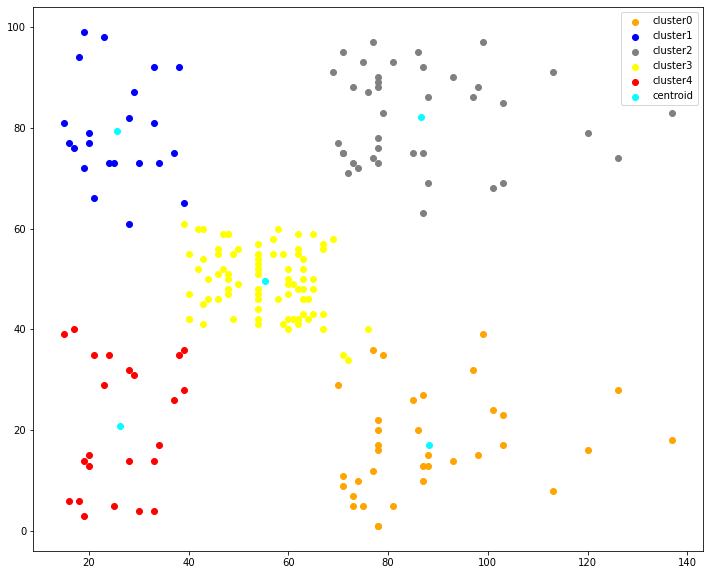

In [33]:
plt.figure(figsize= (12, 10))

plt.scatter(df0['income'], df0['score'] , color= 'orange', label = 'cluster0')
plt.scatter(df1['income'], df1['score'] , color= 'blue', label = 'cluster1')
plt.scatter(df2['income'], df2['score'] , color= 'gray', label = 'cluster2')
plt.scatter(df3['income'], df3['score'] , color= 'yellow', label = 'cluster3')
plt.scatter(df4['income'], df4['score'] , color= 'red', label = 'cluster4')

plt.scatter(centers[:,0], centers[:,1], color='cyan', label='centroid')

plt.legend()

In [34]:
kMean2.predict([[14,40]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])